Feature Description

ph: pH of 1. water (0 to 14).

Hardness: Capacity of water to precipitate soap in mg/L.

Solids: Total dissolved solids in ppm.

Chloramines: Amount of Chloramines in ppm.

Sulfate: Amount of Sulfates dissolved in mg/L.

Conductivity: Electrical conductivity of water in μS/cm.

Organic_carbon: Amount of organic carbon in ppm.

Trihalomethanes: Amount of Trihalomethanes in μg/L.

Turbidity: Measure of light emiting property of water in NTU.

Potability: Indicates if water is safe for human consumption. Potable - 1 and Not potable - 0

In [304]:
# Basic Libraries
import numpy as np
import pandas as pd
from warnings import filterwarnings
from collections import Counter

# Visualizations Libraries
import matplotlib as plt
import seaborn as sns
import plotly 
import plotly.express as px
import plotly.figure_factory as ff
import missingno as msno


# Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

# Modelling Libraries
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import VotingClassifier

# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

Colors

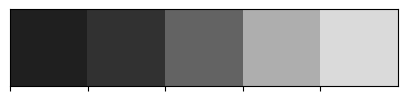

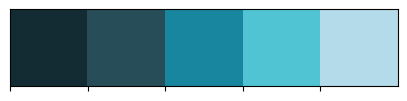

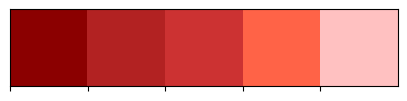

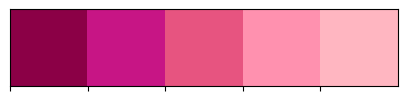

In [305]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_red = ['#8B0000', '#B22222', '#CC3232', '#FF6347', '#FFC1C1']
colors_pink = ['#8B0046', '#C71585', '#E75480', '#FF91AF', '#FFB6C1']


sns.palplot(colors_dark)
sns.palplot(colors_blue)
sns.palplot(colors_red)
sns.palplot(colors_pink)


Dataset Importing

In [306]:
df=pd.read_csv('./water_potability.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [307]:
df.head()


ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

Descriptive visualizations

Potability

In [308]:
import pandas as pd

d = pd.DataFrame({'count': [3000,2000 ]})

fig = px.pie(d, values='count', names=['Not Potable', 'Potable'], hole=0.4, opacity=0.6,
             color_discrete_sequence=[colors_pink[3], colors_blue[3]],
             labels={'label': 'Potability', 'count': 'No. Of Samples'})

fig.update_layout(
    font_family='monospace',
    title=dict(text='Q. How many samples of water are Potable?',x=0.47,y=0.98,
               font=dict(color=colors_dark[2],size=20)),
    legend=dict(x=0.37,y=-0.05,orientation='h',traceorder='reversed'),
    hoverlabel=dict(bgcolor='white'))

fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()

Water Hardness

In [309]:
fig = px.histogram(df,x='Hardness',y=Counter(df['Hardness']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_pink[3],colors_blue[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=151, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)
fig.add_vline(x=301, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)
fig.add_vline(x=76, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<76 mg/L is<br> considered soft',x=40,y=130,showarrow=False,font_size=9)
fig.add_annotation(text='Between 76 and 150<br> (mg/L) is<br>moderately hard',x=113,y=130,showarrow=False,font_size=9)
fig.add_annotation(text='Between 151 and 300 (mg/L)<br> is considered hard',x=250,y=130,showarrow=False,font_size=9)
fig.add_annotation(text='>300 mg/L is<br> considered very hard',x=340,y=130,showarrow=False,font_size=9)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Hardness Distribution',x=0.53,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Hardness (mg/L)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

Water PH level

In [310]:
fig = px.histogram(df,x='ph',y=Counter(df['ph']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_pink[3],colors_blue[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=7, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<7 is Acidic',x=4,y=70,showarrow=False,font_size=10)
fig.add_annotation(text='>7 is Basic',x=10,y=70,showarrow=False,font_size=10)


fig.update_layout(
    font_family='monospace',
    title=dict(text='pH Level Distribution',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='pH Level',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

TDS: TDS means concentration of dissolved particles or solids in water. TDS comprises of inorganic salts such as calcium, magnesium, chlorides, sulfates, bicarbonates, etc, along with many more inorganic compounds that easily dissolve in water.

In [311]:
fig = px.histogram(df,x='Solids',y=Counter(df['Solids']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_pink[3],colors_blue[3]],
                  barmode='group',histfunc='count')

fig.update_layout(
    font_family='monospace',
    title=dict(text='Distribution Of Total Dissolved Solids',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Dissolved Solids (ppm)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

Chloramines: Chloramines (also known as secondary disinfection) are disinfectants used to treat drinking water and they:

Are most commonly formed when ammonia is added to chlorine to treat drinking water.
Provide longer-lasting disinfection as the water moves through pipes to consumers.
Chloramines have been used by water utilities since the 1930s.

In [312]:
fig = px.histogram(df,x='Chloramines',y=Counter(df['Chloramines']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_pink[3],colors_blue[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=4, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<4 ppm is considered<br> safe for drinking',x=1.8,y=90,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Chloramines Distribution',x=0.53,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Chloramines (ppm)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

Sulfate: Sulfate (SO4) can be found in almost all natural water. The origin of most sulfate compounds is the oxidation of sulfite ores, the presence of shales, or the industrial wastes. Sulfate is one of the major dissolved components of rain. High concentrations of sulfate in the water we drink can have a laxative effect when combined with calcium and magnesium, the two most common constituents of hardness.

In [313]:
fig = px.histogram(df,x='Sulfate',y=Counter(df['Sulfate']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_pink[3],colors_blue[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=250, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<250 mg/L is considered<br> safe for drinking',x=175,y=90,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Sulfate Distribution',x=0.53,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Sulfate (mg/L)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

Conductivity: Conductivity is a measure of the ability of water to pass an electrical current. Because dissolved salts and other inorganic chemicals conduct electrical current, conductivity increases as salinity increases. Organic compounds like oil do not conduct electrical current very well and therefore have a low conductivity when in water. Conductivity is also affected by temperature: the warmer the water, the higher the conductivity.

In [314]:
fig = px.histogram(df,x='Conductivity',y=Counter(df['Conductivity']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_pink[3],colors_blue[3]],
                  barmode='group',histfunc='count')

fig.add_annotation(text='The Conductivity range <br> is safe for both (200-800),<br> Potable and Non-Potable water',
                   x=600,y=90,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Conductivity Distribution',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Conductivity (μS/cm)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

Organic Carbon: Organic contaminants (natural organic substances, insecticides, herbicides, and other agricultural chemicals) enter waterways in rainfall runoff. Domestic and industrial wastewaters also contribute organic contaminants in various amounts. As a result of accidental spills or leaks, industrial organic wastes may enter streams. Some of the contaminants may not be completely removed by treatment processes; therefore, they could become a problem for drinking water sources. It is important to know the organic content in a waterway.

In [315]:
fig = px.histogram(df,x='Organic_carbon',y=Counter(df['Organic_carbon']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_pink[3],colors_blue[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=10, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='Typical Organic Carbon<br> level is upto 10 ppm',x=5.3,y=110,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Organic Carbon Distribution',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Organic Carbon (ppm)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

Trihalomethanes: Trihalomethanes (THMs) are the result of a reaction between the chlorine used for disinfecting tap water and natural organic matter in the water. At elevated levels, THMs have been associated with negative health effects such as cancer and adverse reproductive outcomes.

In [316]:
fig = px.histogram(df,x='Trihalomethanes',y=Counter(df['Trihalomethanes']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_pink[3],colors_blue[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=80, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='Upper limit of Trihalomethanes<br> level is 80 μg/L',x=115,y=90,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Trihalomethanes Distribution',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Trihalomethanes (μg/L)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

Turbidity: Turbidity is the measure of relative clarity of a liquid. It is an optical characteristic of water and is a measurement of the amount of light that is scattered by material in the water when a light is shined through the water sample. The higher the intensity of scattered light, the higher the turbidity. Material that causes water to be turbid include clay, silt, very tiny inorganic and organic matter, algae, dissolved colored organic compounds, and plankton and other microscopic organisms.

In [317]:
fig = px.histogram(df,x='Turbidity',y=Counter(df['Turbidity']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_pink[3],colors_blue[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=5, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<5 NTU Turbidity is<br> considered safe',x=6,y=90,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Turbidity Distribution',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Turbidity (NTU)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

Studying the correlation between the different attributes.

In [318]:
fig = px.scatter_matrix(df,df.drop('Potability',axis=1),height=1250,width=1250,template='plotly_white',opacity=0.7,
                        color_discrete_sequence=[colors_blue[3],colors_pink[2]],color='Potability',
                       symbol='Potability',color_continuous_scale=[colors_pink[1],colors_blue[4]])

fig.update_layout(font_family='monospace',font_size=10,
                  coloraxis_showscale=False,
                 legend=dict(x=0.02,y=1.07,bgcolor=colors_dark[4]),
                 title=dict(text='Scatter Plot Matrix b/w Features',x=0.5,y=0.97,
                   font=dict(color=colors_dark[2],size=24)))
fig.show()

In [319]:
cor=df.drop('Potability',axis=1).corr()
cor

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.082096 -0.089288    -0.034350  0.018203   
Hardness         0.082096  1.000000 -0.046899    -0.030054 -0.106923   
Solids          -0.089288 -0.046899  1.000000    -0.070148 -0.171804   
Chloramines     -0.034350 -0.030054 -0.070148     1.000000  0.027244   
Sulfate          0.018203 -0.106923 -0.171804     0.027244  1.000000   
Conductivity     0.018614 -0.023915  0.013831    -0.020486 -0.016121   
Organic_carbon   0.043503  0.003610  0.010242    -0.012653  0.030831   
Trihalomethanes  0.003354 -0.013013 -0.009143     0.017084 -0.030274   
Turbidity       -0.039057 -0.014449  0.019546     0.002363 -0.011187   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
ph                   0.018614        0.043503         0.003354  -0.039057  
Hardness            -0.023915        0.003610        -0.013013  -0.014449  
Solids               0.013831        0.010242        -0.009143   0.019546  
Chloramines         -0.020486       -0.012653         0.017084   0.002363  
Sulfate             -0.016121        0.030831        -0.030274  -0.011187  
Conductivity         1.000000        0.020966         0.001285   0.005798  
Organic_carbon       0.020966        1.000000        -0.013274  -0.027308  
Trihalomethanes      0.001285       -0.013274         1.000000  -0.022145  
Turbidity            0.005798       -0.027308        -0.022145   1.000000

As we can see, there is little to no correlation between the attributes. Which leads us to the conclusion that no Multicolineaity issue is faced in our case.


****The absence of correlations generally indicates that multicollinearity is not an issue in your data.
This simplifies model building, improves the interpretability of coefficients, and enhances the stability and reliability of your models.
However, always validate this assumption with diagnostics like VIF, even if initial correlations suggest low multicollinearity.



To visualize better this, find the next heatmap.

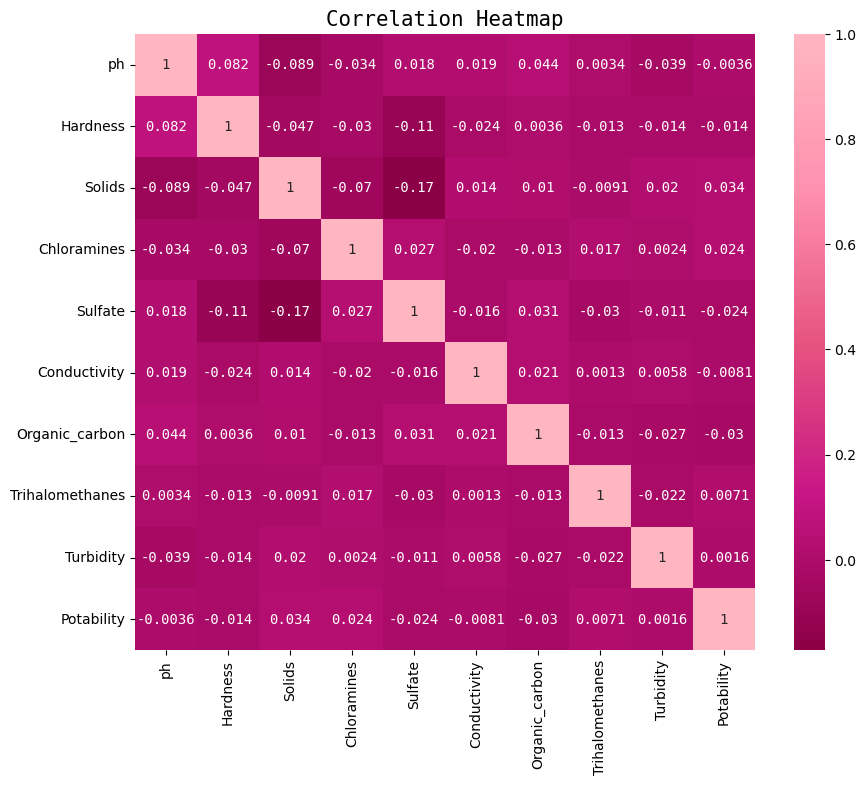

In [320]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

# Create a custom colormap from the specified pink colors
pink_cmap = LinearSegmentedColormap.from_list('pink_cmap', colors_pink)

# Define the function to plot the correlation heatmap
def correlation_heatmap(df):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap=pink_cmap, annot_kws={"fontfamily": "monospace", "fontsize": 10})
    plt.title('Correlation Heatmap',fontdict={'family': 'monospace', 'fontsize': 15})
    plt.show()

# Call the function with your DataFrame
correlation_heatmap(df)


DATA PREPPING

1- Missing Values

Missing Data:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Missing Data Percentage:
ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64


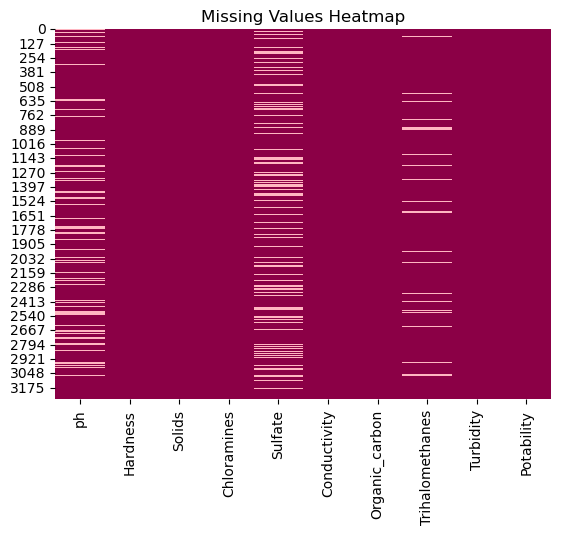

In [321]:
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

print("Missing Data:")
print(missing_data)
print("\nMissing Data Percentage:")
print(missing_percentage)


# Visualizing missing data
sns.heatmap(df.isnull(), cbar=False, cmap=pink_cmap)
plt.title("Missing Values Heatmap")
plt.show()


We notice that there are missing data in the visualization above. Those need to be adressed. There are a few ways I can go about this: removing the missing observations or replace with the median/mean...
I would rather not delete the missing data observations because that will reduce the dataset size significantly. Therefore we will look to replace them.
I'll start by measuring the medians of potable and non-potable observations.

In [322]:
df[df['Potability']==0].describe()


ph     Hardness        Solids  Chloramines      Sulfate  \
count  1684.000000  1998.000000   1998.000000  1998.000000  1510.000000   
mean      7.085378   196.733292  21777.490788     7.092175   334.564290   
std       1.683499    31.057540   8543.068788     1.501045    36.745549   
min       0.000000    98.452931    320.942611     1.683993   203.444521   
25%       6.037723   177.823265  15663.057382     6.155640   311.264006   
50%       7.035456   197.123423  20809.618280     7.090334   333.389426   
75%       8.155510   216.120687  27006.249009     8.066462   356.853897   
max      14.000000   304.235912  61227.196008    12.653362   460.107069   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  Potability  
count   1998.000000     1998.000000      1891.000000  1998.000000      1998.0  
mean     426.730454       14.364335        66.303555     3.965800         0.0  
std       80.047317        3.334554        16.079320     0.780282         0.0  
min      181.483754        4.371899         0.738000     1.450000         0.0  
25%      368.498530       12.101057        55.706530     3.444062         0.0  
50%      422.229331       14.293508        66.542198     3.948076         0.0  
75%      480.677198       16.649485        77.277704     4.496106         0.0  
max      753.342620       28.300000       120.030077     6.739000         0.0

In [323]:
df[df['Potability']==0][['ph','Sulfate','Trihalomethanes']].median()


ph                   7.035456
Sulfate            333.389426
Trihalomethanes     66.542198
dtype: float64

In [324]:
df[df['Potability']==1].describe()


ph     Hardness        Solids  Chloramines     Sulfate  \
count  1101.000000  1278.000000   1278.000000  1278.000000  985.000000   
mean      7.073783   195.800744  22383.991018     7.169338  332.566990   
std       1.448048    35.547041   9101.010208     1.702988   47.692818   
min       0.227499    47.432000    728.750830     0.352000  129.000000   
25%       6.179312   174.330531  15668.985035     6.094134  300.763772   
50%       7.036752   196.632907  21199.386614     7.215163  331.838167   
75%       7.933068   218.003420  27973.236446     8.199261  365.941346   
max      13.175402   323.124000  56488.672413    13.127000  481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  Potability  
count   1278.000000     1278.000000      1223.000000  1278.000000      1278.0  
mean     425.383800       14.160893        66.539684     3.968328         1.0  
std       82.048446        3.263907        16.327419     0.780842         0.0  
min      201.619737        2.200000         8.175876     1.492207         1.0  
25%      360.939023       12.033897        56.014249     3.430909         1.0  
50%      420.712729       14.162809        66.678214     3.958576         1.0  
75%      484.155911       16.356245        77.380975     4.509569         1.0  
max      695.369528       23.604298       124.000000     6.494249         1.0

In [325]:
df[df['Potability']==1][['ph','Sulfate','Trihalomethanes']].median()


ph                   7.036752
Sulfate            331.838167
Trihalomethanes     66.678214
dtype: float64

We note that the difference between the mean and median values of Potable and Non-Potable Water is minimal. So we use the overall median of each attribute to replace the missing values

In [326]:
df.fillna({'Sulfate': df['Sulfate'].median()}, inplace=True)
df.fillna({'Trihalomethanes': df['Trihalomethanes'].median()}, inplace=True)
df.fillna({'ph': df['ph'].median()}, inplace=True)


In [327]:
df.isnull().sum()


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

And just like that, we have replaced all our null and we possess a complete dataset.

In [328]:
# Descriptive statistics
print("Descriptive Statistics:")
print(df.describe())


Descriptive Statistics:
                ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.074194   196.369496  22014.092526     7.122277   333.608364   
std       1.470040    32.879761   8768.570828     1.583085    36.143851   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.407478     3.966786     0.390110  
std       80.824064        3.308162        15.769958     

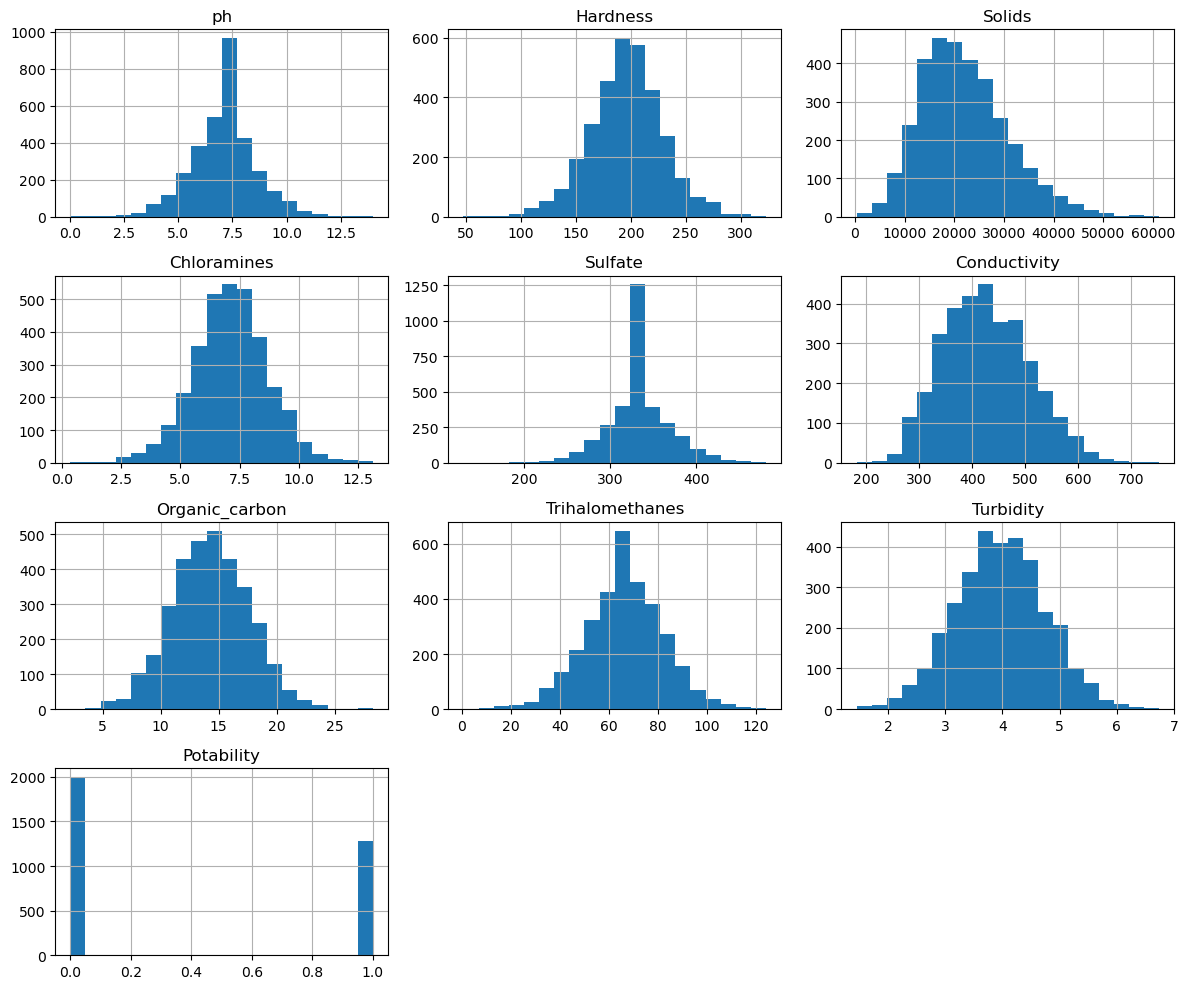

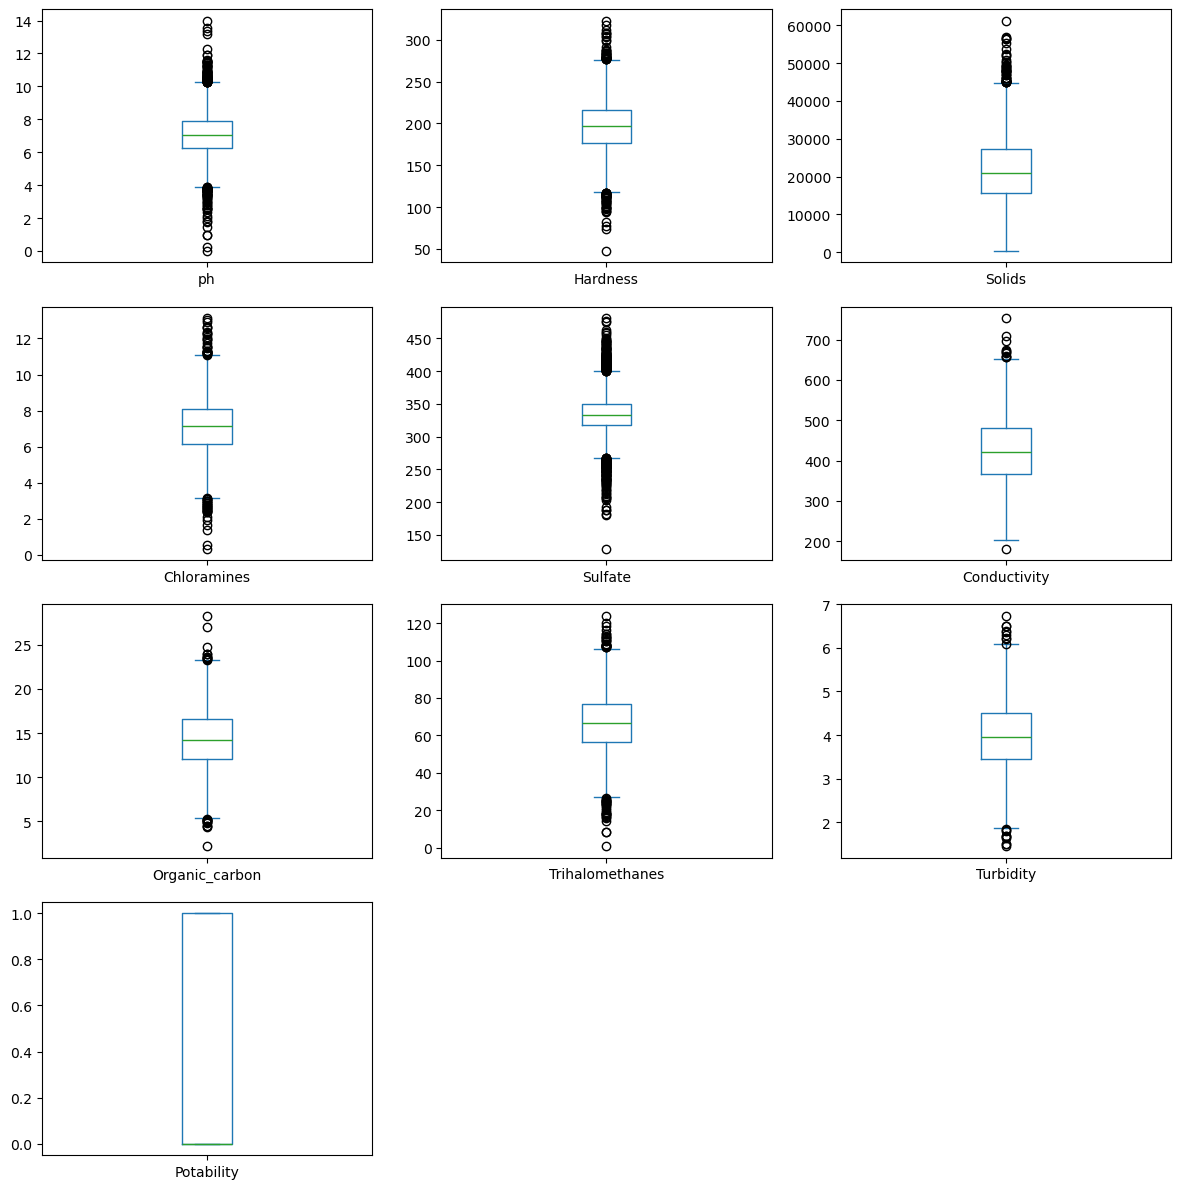

In [341]:
# Plotting histograms for each feature to visualize distribution
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

# Boxplot for each feature to detect outliers
df.plot(kind='box', subplots=True, layout=(4,3), figsize=(12,12), sharex=False, sharey=False,)
plt.tight_layout()
plt.show()


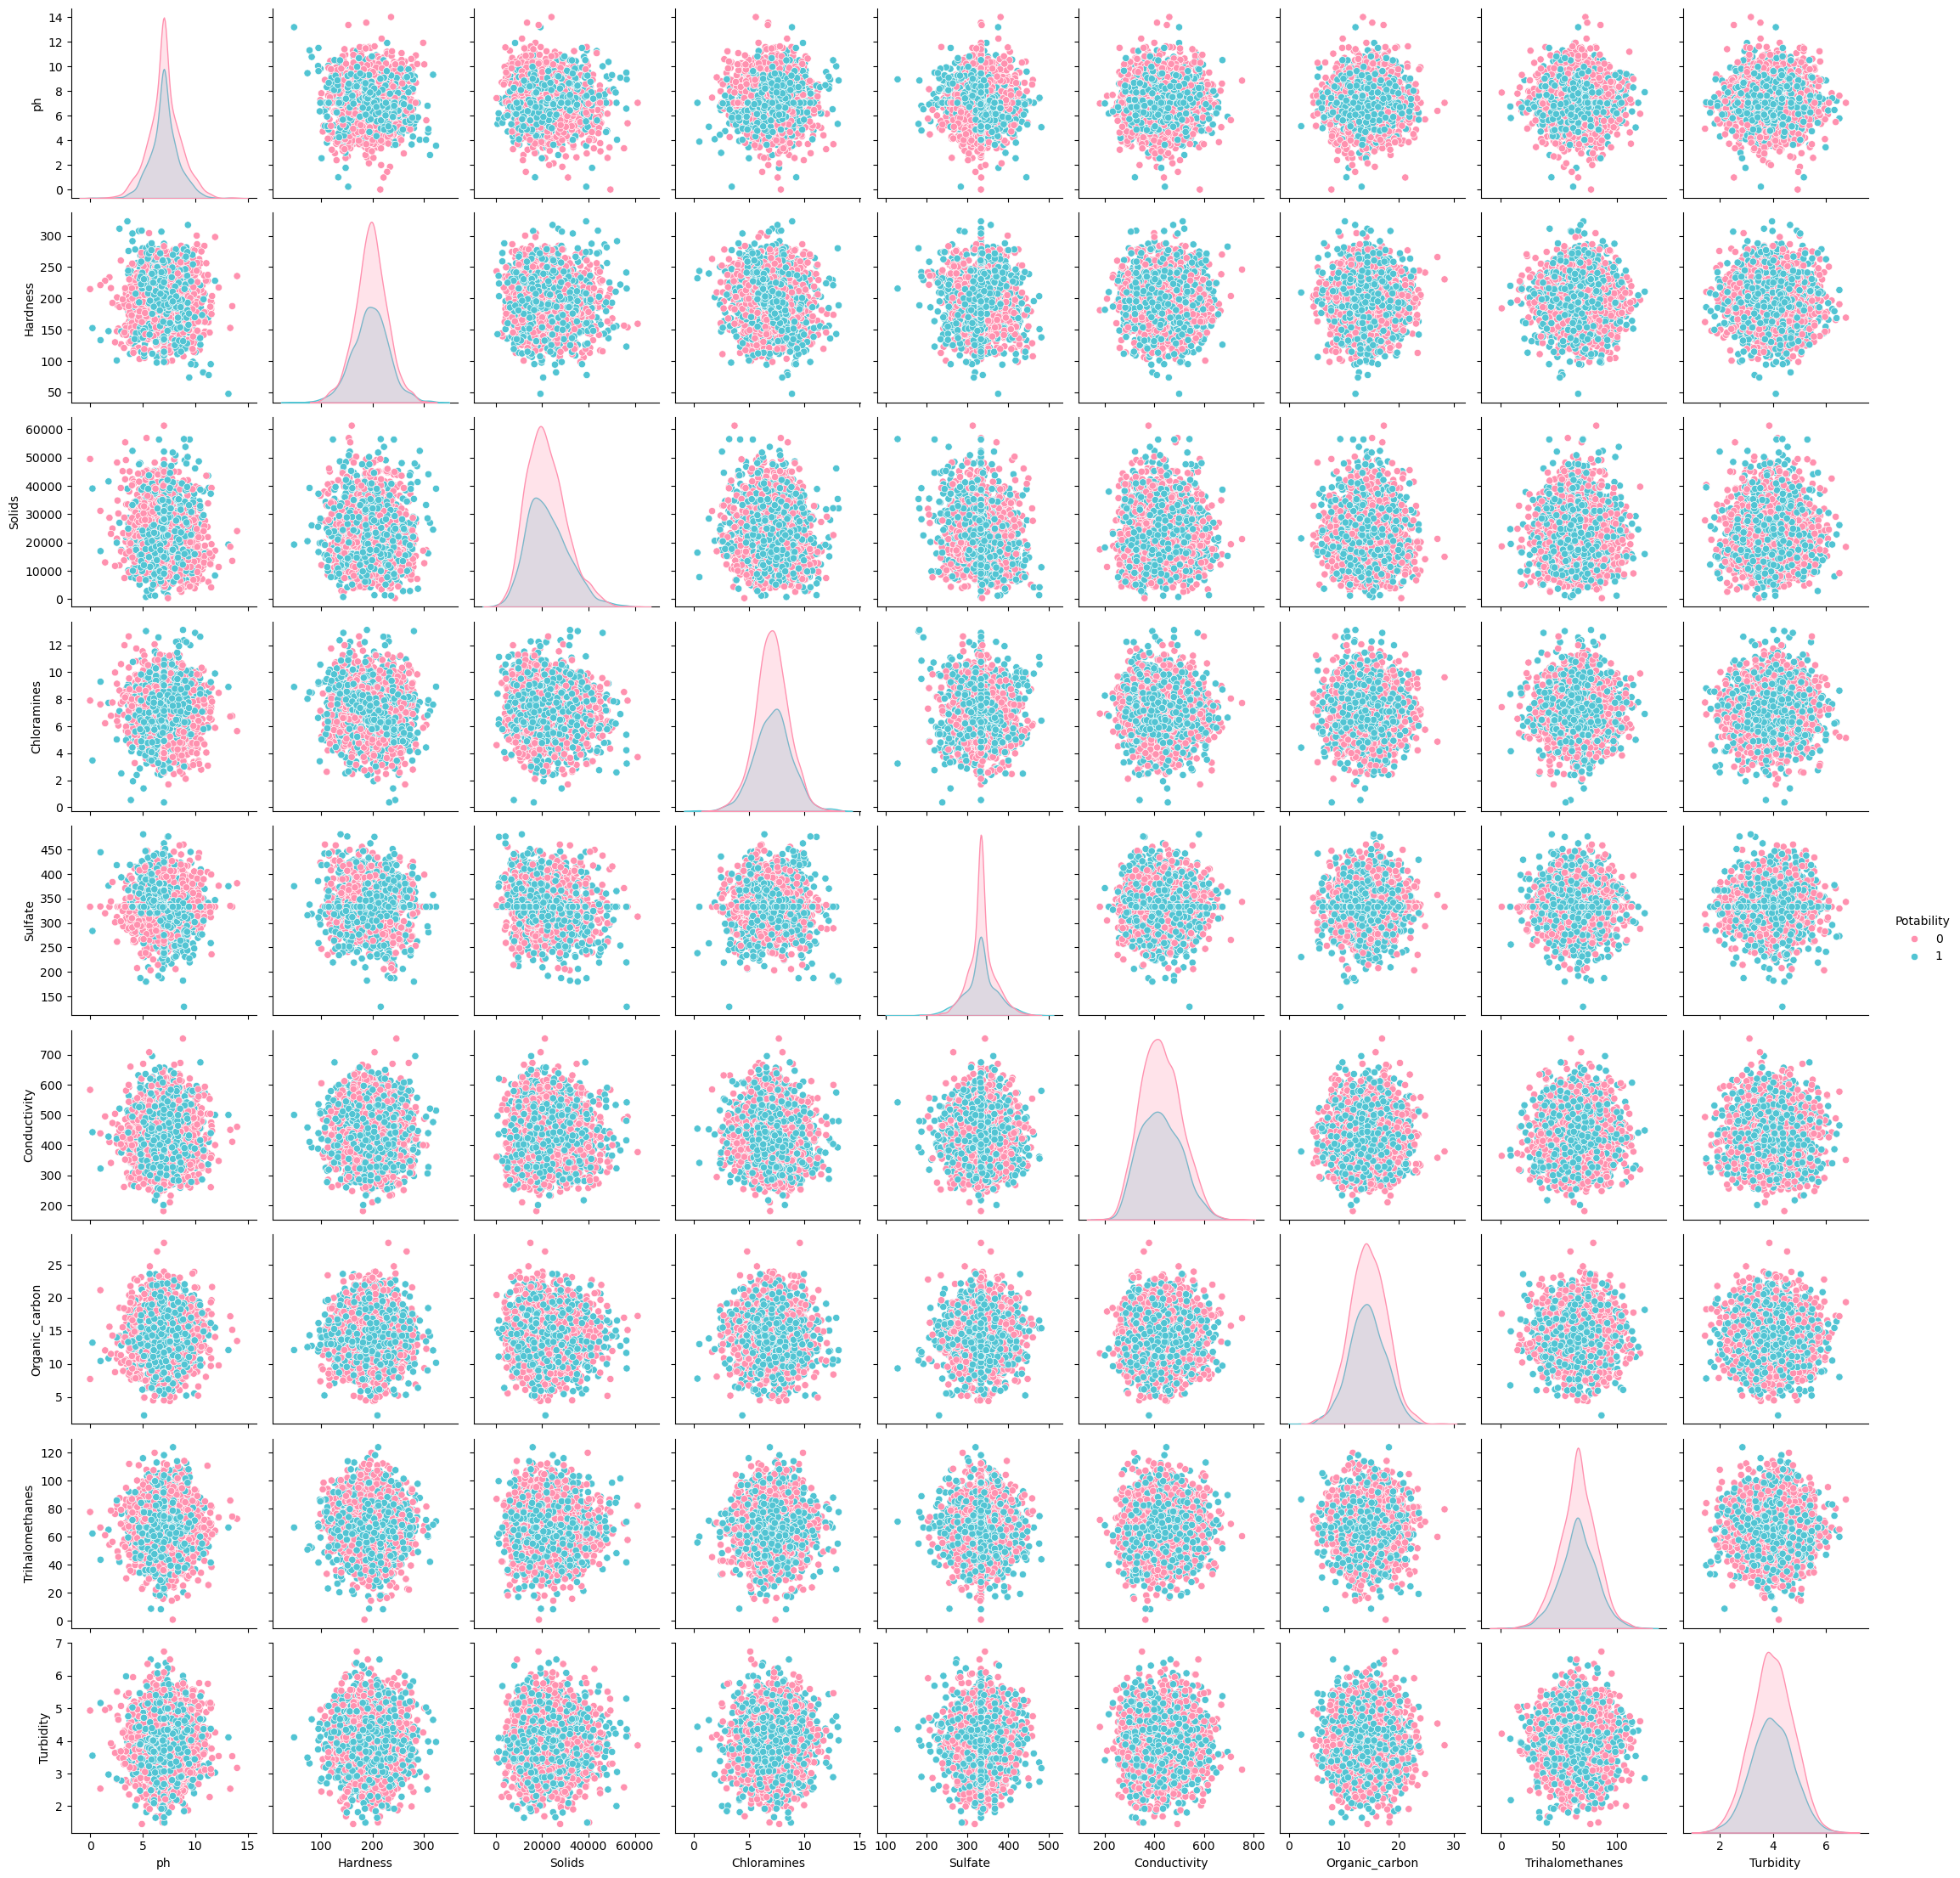

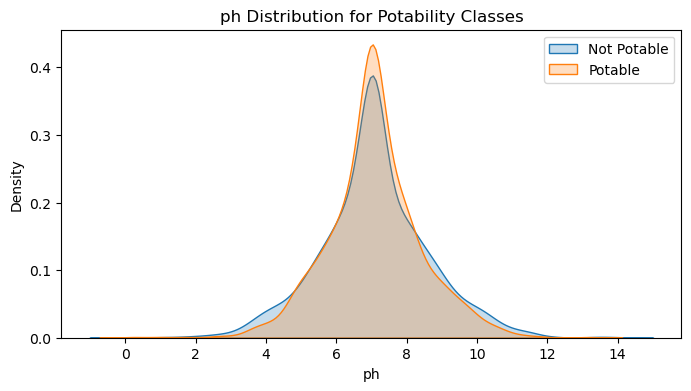

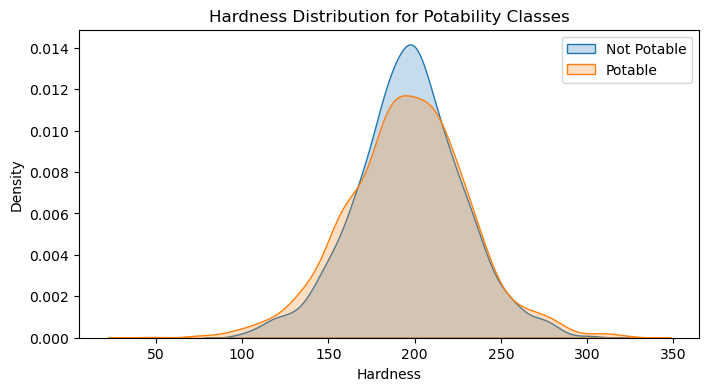

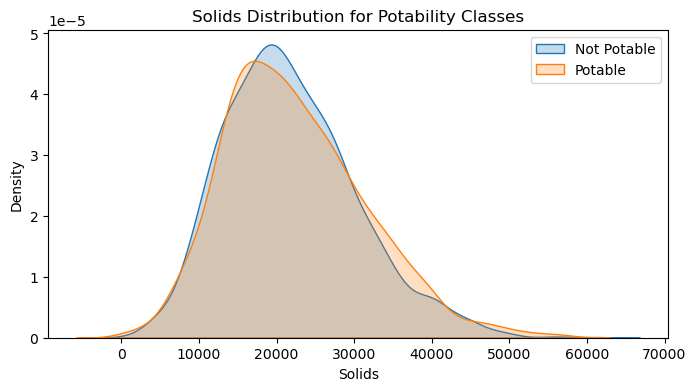

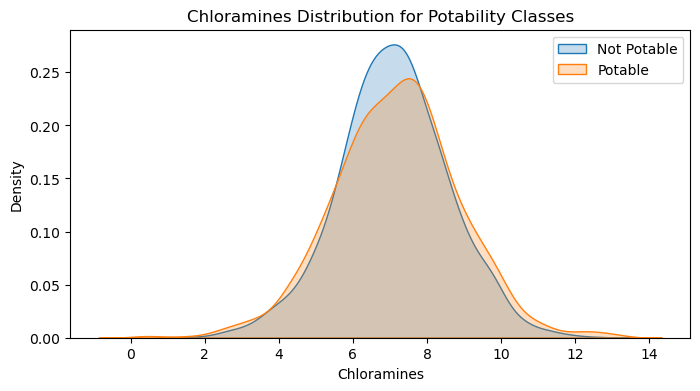

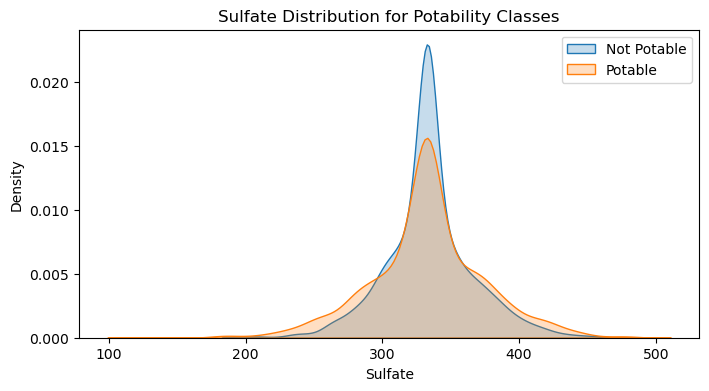

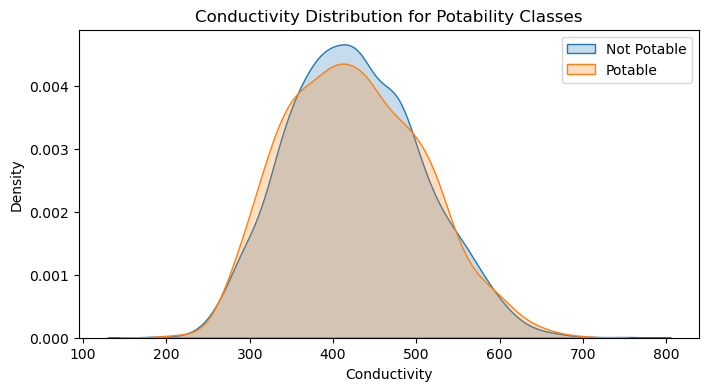

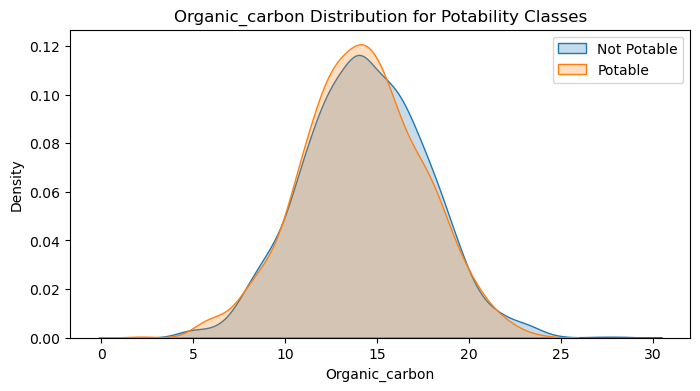

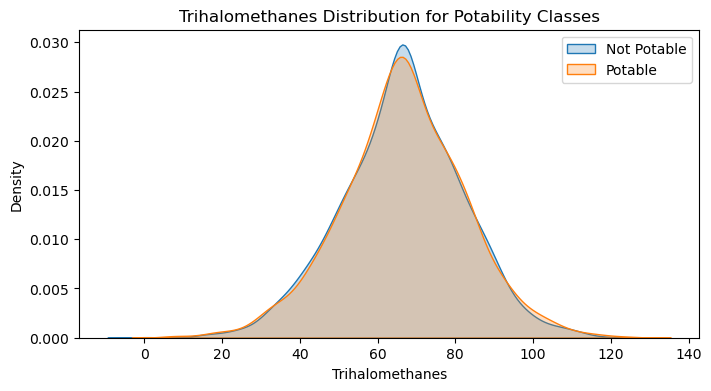

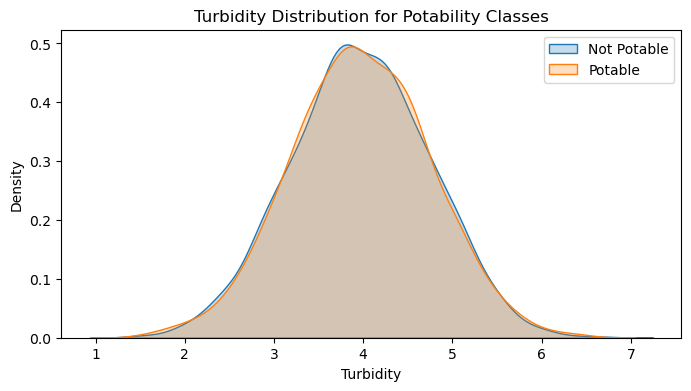

In [358]:
# Scatter plot matrix to observe interactions between features
sns.pairplot(df, hue="Potability", diag_kind="kde",  palette=[colors_pink[3], colors_blue[3]])
plt.show()

# Comparing feature distributions for Potability (0 vs 1)
for column in df.columns[:-1]:  # excluding 'Potability'
    plt.figure(figsize=(8, 4), )
    sns.kdeplot(df[column][df['Potability'] == 0], label='Not Potable', shade=True,  palette= colors_blue[3])
    sns.kdeplot(df[column][df['Potability'] == 1], label='Potable', shade=True,  palette=colors_pink[3])
    plt.title(f'{column} Distribution for Potability Classes')
    plt.legend()
    plt.show()



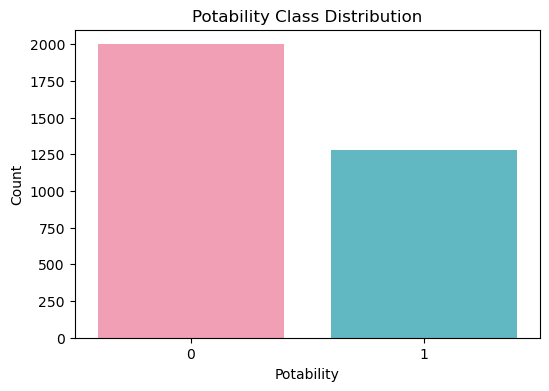

In [356]:
# Check for class imbalance in Potability
potability_counts = df['Potability'].value_counts()

# Plot the distribution of Potability
plt.figure(figsize=(6, 4))
sns.barplot(x=potability_counts.index, y=potability_counts.values, palette=[colors_pink[3], colors_blue[3]])
plt.title("Potability Class Distribution")
plt.xlabel("Potability")
plt.ylabel("Count")
plt.show()


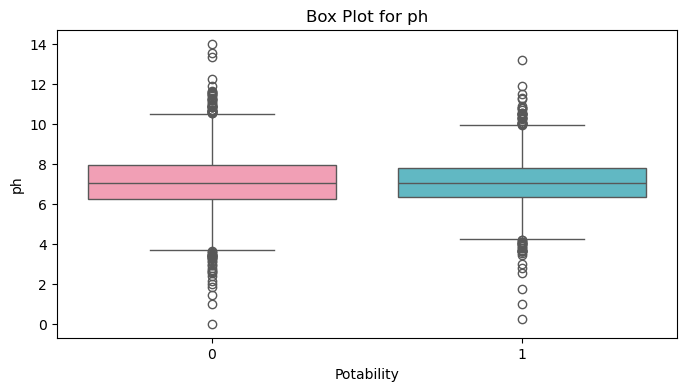

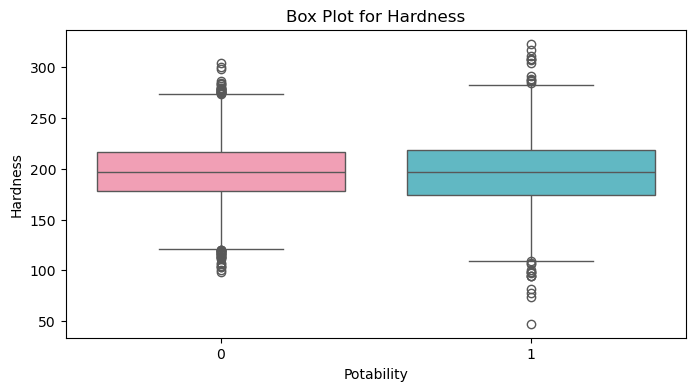

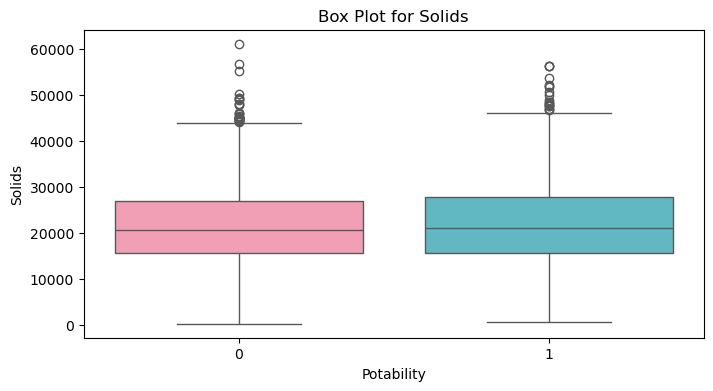

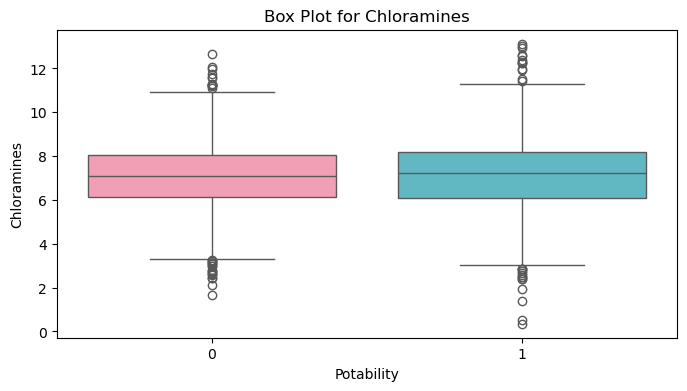

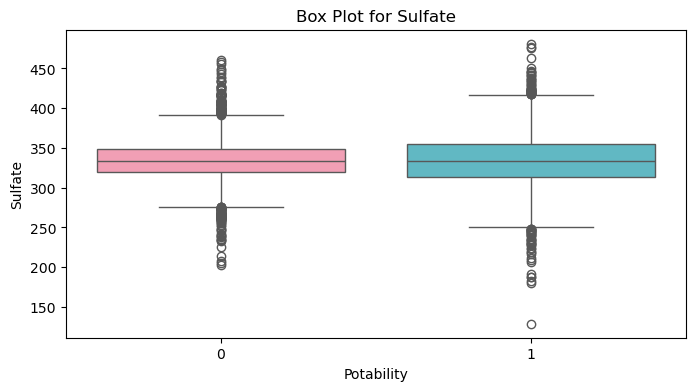

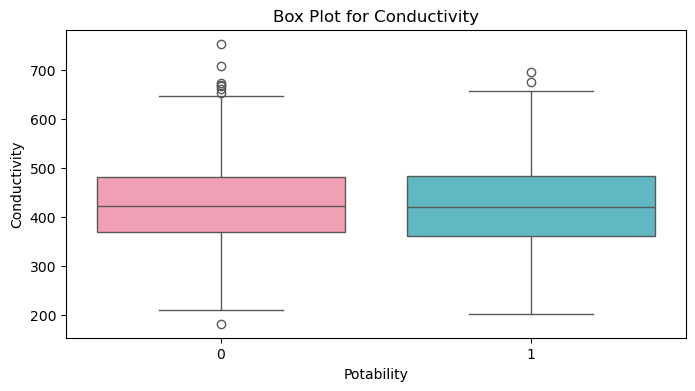

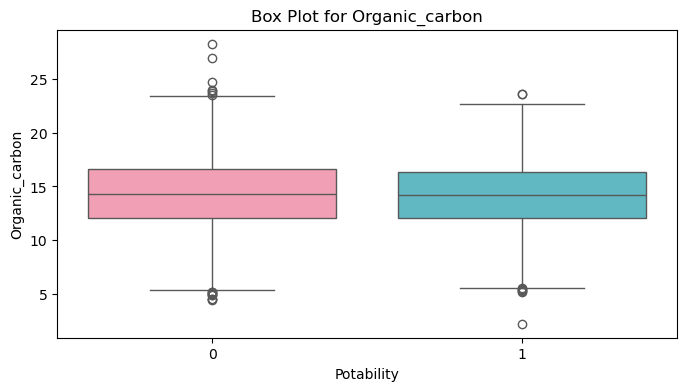

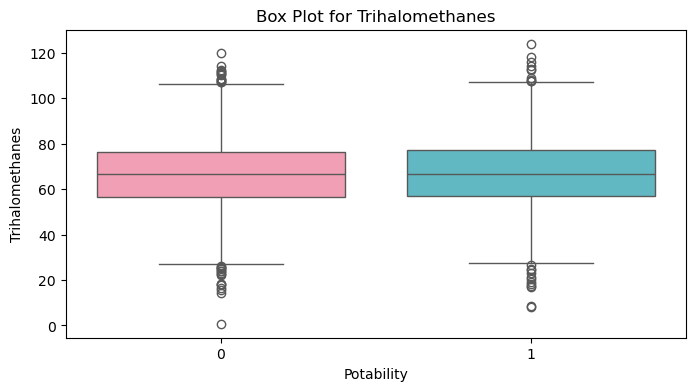

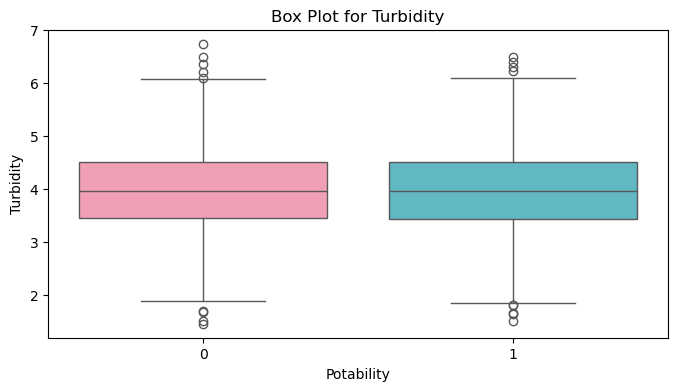

In [365]:
# Box plots for each feature to detect outliers
for column in df.columns[:-1]:  # Excluding 'Potability'
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x="Potability", y=column, palette=[colors_pink[3], colors_blue[3]])
    plt.title(f'Box Plot for {column}')
    plt.show()



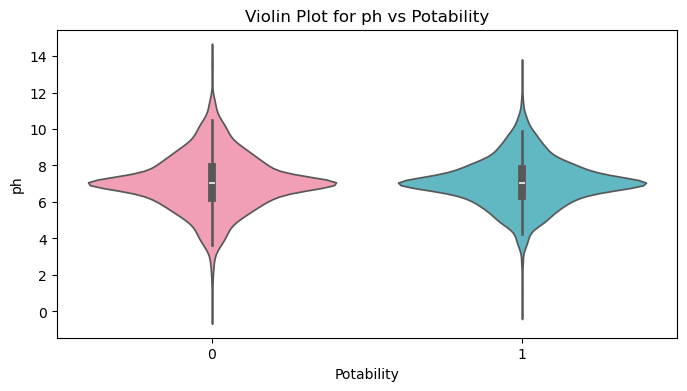

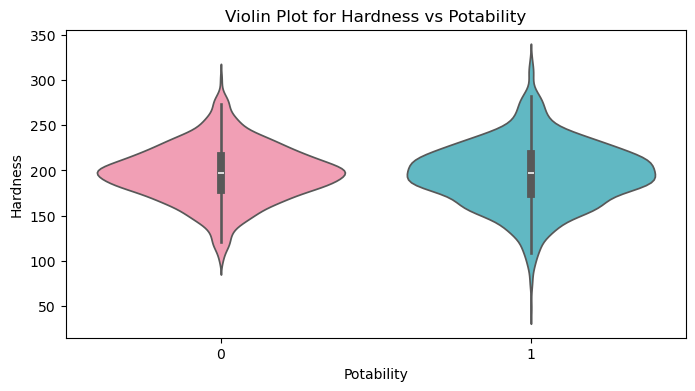

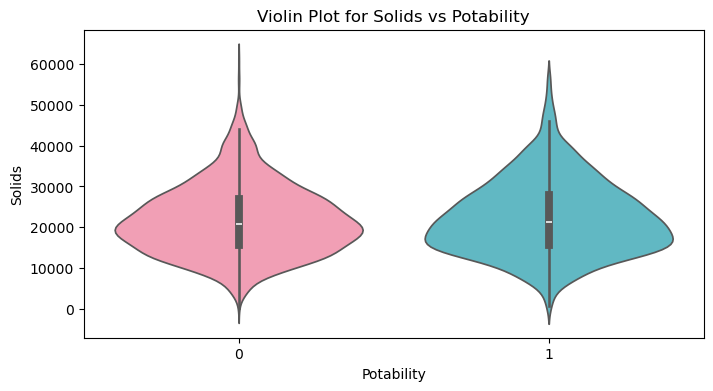

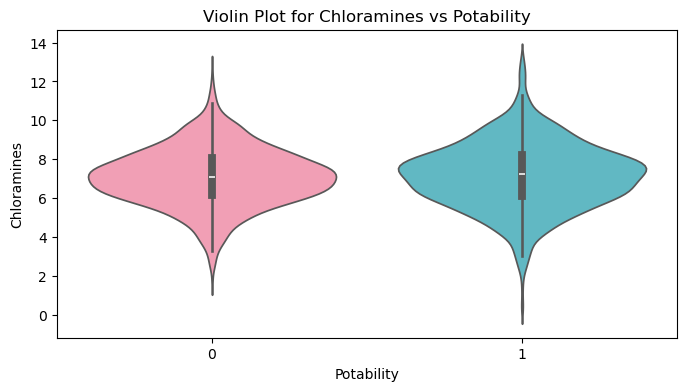

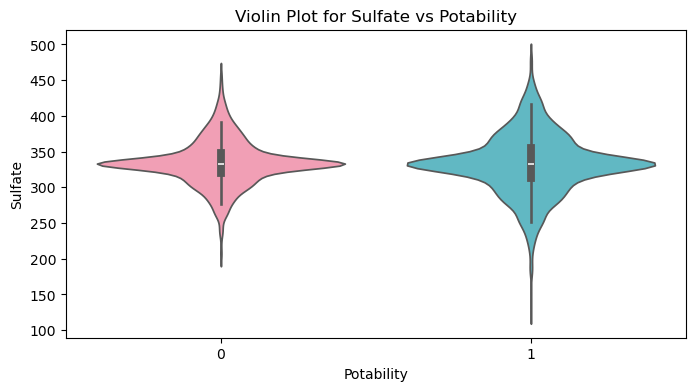

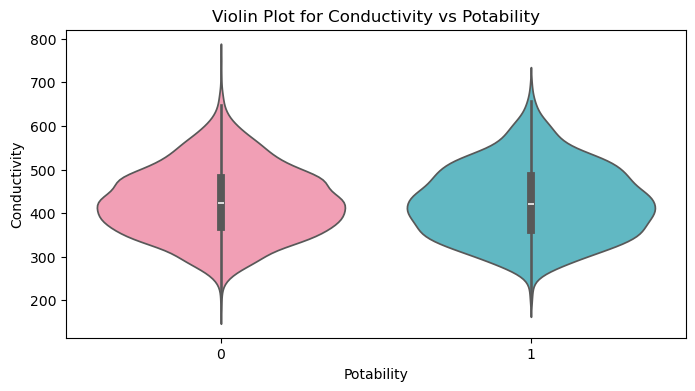

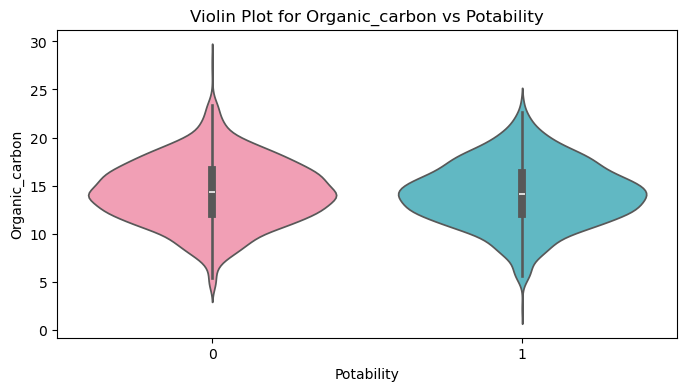

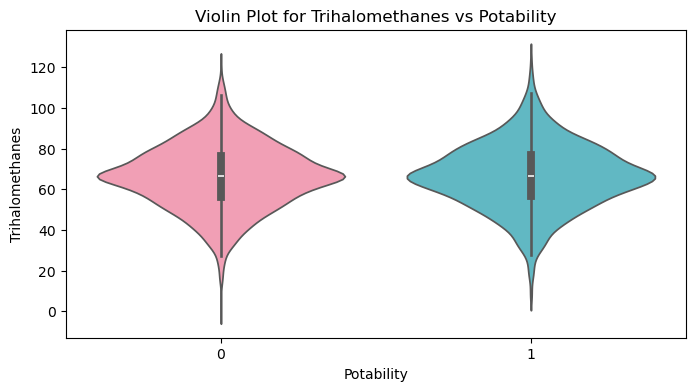

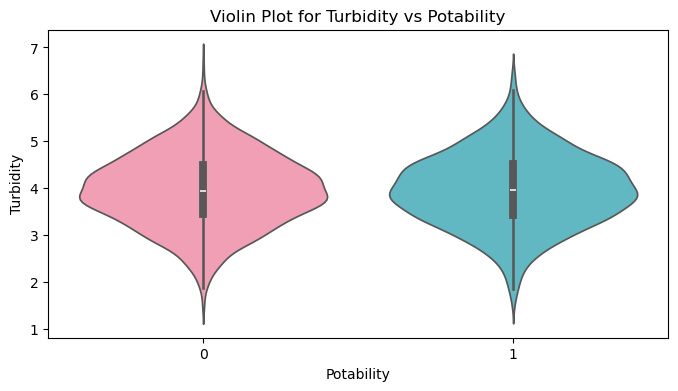

In [364]:
# Comparing Potability with individual features using box plots
for column in df.columns[:-1]:  # Excluding 'Potability'
    plt.figure(figsize=(8, 4))
    sns.violinplot(x="Potability", y=column, data=df, palette=[colors_pink[3], colors_blue[3]])
    plt.title(f'Violin Plot for {column} vs Potability')
    plt.show()


Data Standardization.
+ Dividing train and test sets.

In [ ]:
X = df.drop('Potability',axis=1).values
y = df['Potability'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

The primary purpose of this code is to prepare the data for a machine learning model by splitting it into training and testing sets and scaling the features. 
Scaling helps to improve the performance and convergence of many machine learning algorithms, especially those that rely on distance measurements, such as SVMs, K-nearest neighbors, and neural networks.

Modelling

Spot checking: Spot checking is a great method to find out the baseline models for our data. It's quite easy and quick.

In [ ]:
filterwarnings('ignore')
models =[("LR", LogisticRegression(max_iter=1000)),("SVC", SVC()),('KNN',KNeighborsClassifier(n_neighbors=10)),
         ("DTC", DecisionTreeClassifier()),("GNB", GaussianNB()),
        ("SGDC", SGDClassifier()),("Perc", Perceptron()),("NC",NearestCentroid()),
        ("Ridge", RidgeClassifier()),("NuSVC", NuSVC()),("BNB", BernoulliNB()),
         ('RF',RandomForestClassifier()),('ADA',AdaBoostClassifier()),
        ('XGB',GradientBoostingClassifier()),('PAC',PassiveAggressiveClassifier())]

results = []
names = []
finalResults = []

for name,model in models:
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    score = precision_score(y_test, model_results,average='macro')
    results.append(score)
    names.append(name)
    finalResults.append((name,score))
    
finalResults.sort(key=lambda k:k[1],reverse=True)

finalResults

///////////////////////////////////////////////////////////////////////////////////////


In [ ]:
# model_params = {
#     'XGB':
#     {
#         'model':GradientBoostingClassifier(),
#         'params':
#         {
#             'learning_rate':[0.0001,0.001,0.01,0.1],
#             'n_estimators':[100,200,500,1000],
#             'max_features':['sqrt','log2'],
#             'max_depth':list(range(11))
#         }
#     },
#     'Random Forest':
#     {
#         'model':RandomForestClassifier(),
#         'params':
#         {
#             'n_estimators':[10,50,100,200],
#             'max_features':['auto','sqrt','log2'],
#             'max_depth':list(range(1,11))
#         }
#     },

#     # 'SVC': {
#     #     'model': SVC(),
#     #     'params': {
#     #         'C': [0.1, 1, 10, 100],              # Regularization parameter
#     #         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel types
#     #         'degree': [2, 3, 4],                  # Degree of the polynomial kernel function (if kernel='poly')
#     #         'gamma': ['scale', 'auto', 0.01, 0.1, 1], # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
#     #         'coef0': [0.0, 0.1, 0.5],             # Independent term in kernel function (only for poly and sigmoid)
#     #         'shrinking': [True, False],           # Whether to use the shrinking heuristic
#     #     }
#     # }
# }


In [ ]:
# cv = RepeatedStratifiedKFold(n_splits=3,n_repeats=1)
# scores=[]
# for model_name,params in model_params.items():
#     rs = RandomizedSearchCV(params['model'],params['params'],cv=cv,n_iter=5)
#     rs.fit(X,y)
#     scores.append([model_name,dict(rs.best_params_),rs.best_score_])
# data=pd.DataFrame(scores,columns=['Model','Parameters','Score'])
# data

So now we have the best parameters for our final ensembled model. I used the VotingClassfier to ensemble the models for better results.

In [ ]:
# # from sklearn.svm import SVC


# param=data['Parameters']
# model = VotingClassifier(estimators=[
#                                      ('XGB',GradientBoostingClassifier(**param[0])),
#                                      ('RF',RandomForestClassifier(**param[1])),
#                                     #  ('SVC',SVC(**param[2]))
#                                     ],voting='hard')

# accuracy=[]
# scaler = StandardScaler()
# skf = RepeatedStratifiedKFold(n_splits=5,n_repeats=2)
# skf.get_n_splits(X,y)

# for train_index, test_index in skf.split(X,y):
    
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
    
#     scaler.fit(X_train)
#     X_train = scaler.transform(X_train)
#     X_test = scaler.transform(X_test)
    
#     model.fit(X_train,y_train)
#     predictions=model.predict(X_test)
#     score=accuracy_score(y_test,predictions)
#     accuracy.append(score)    



# np.mean(accuracy)

Let's study each model individually. I will be testing the following models:
Logistic Regression:
Random Forest:
Gradient Boosting:
SVM : Support Vector Machine Model

///////////////////////// Logistic Regression

Feature selection
Recursive feature elimination

Given an external estimator that assigns weights to features, recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [ ]:
X_test.shape


In [ ]:
X_train.shape

In [ ]:
y_test.shape

In [ ]:
y_train.shape

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

In [ ]:
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The model predicts all samples as not potable (Potability = 0), which leads to poor performance for the potable class (Potability = 1).
This imbalance suggests that the model is not learning to distinguish between the two classes well, likely due to data imbalance or insufficient feature signal.

To address class imbalance in your logistic regression model, I will try techniques like Synthetic Minority Over-sampling Technique (SMOTE) or by adjusting the class weights directly.

Method 1: Using SMOTE: 
SMOTE is an oversampling technique that generates synthetic samples for the minority class.

Method 2: Using Class Weight: 
Adjusting class weights directly in the logistic regression model to penalize misclassifications of the minority class.

In [ ]:
from imblearn.over_sampling import SMOTE

### Method 1: Using SMOTE to handle class imbalance ###
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize and train the Logistic Regression model on SMOTE data
model_smote = LogisticRegression(random_state=42)
model_smote.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_smote = model_smote.predict(X_test)

# Evaluate the SMOTE model
accuracy_smote = accuracy_score(y_test, y_pred_smote)
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
class_report_smote = classification_report(y_test, y_pred_smote)

# Display the results for SMOTE
print("=== SMOTE Logistic Regression Model ===")
print(f"Accuracy: {accuracy_smote * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix_smote)
print("Classification Report:")
print(class_report_smote)


### Method 2: Using Class Weight to handle class imbalance ###
# Initialize and train the Logistic Regression model with balanced class weights
model_weighted = LogisticRegression(random_state=42, class_weight='balanced')
model_weighted.fit(X_train, y_train)

# Make predictions
y_pred_weighted = model_weighted.predict(X_test)

# Evaluate the weighted model
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
conf_matrix_weighted = confusion_matrix(y_test, y_pred_weighted)
class_report_weighted = classification_report(y_test, y_pred_weighted)

# Display the results for Class Weight
print("\n=== Weighted Logistic Regression Model ===")
print(f"Accuracy: {accuracy_weighted * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix_weighted)
print("Classification Report:")
print(class_report_weighted)

Both of these techniques led to a drop in the accuracy. Therefore, they are obsolete in our case.

Let's try feature engineering.

Interaction Features: Helps capture relationships between pairs of features that might be important but aren't captured by individual features.

Polynomial Features: Captures non-linear relationships, making the model more expressive.

Feature Selection: Ensures that only the most relevant features are used, which helps reduce overfitting and improves model performance.


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

#  1. Feature Engineering: Create Interaction Features
# Create interaction terms between features
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
X_train_inter = poly.fit_transform(X_train)
X_test_inter = poly.transform(X_test)

# 2. Feature Engineering: Polynomial Features
# Create polynomial features (degree 2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Combine interaction and polynomial features
X_train_enhanced = np.hstack((X_train_inter, X_train_poly))
X_test_enhanced = np.hstack((X_test_inter, X_test_poly))

# 3. Feature Engineering: Feature Selection
# Recursive Feature Elimination (RFE) to select important features
log_reg = LogisticRegression(random_state=42, max_iter=500)
rfe = RFE(estimator=log_reg, n_features_to_select=6)  # You can adjust the number of features
X_train_selected = rfe.fit_transform(X_train_enhanced, y_train)
X_test_selected = rfe.transform(X_test_enhanced)






# Train the logistic regression model on selected features
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train_selected, y_train)

# Make predictions
y_pred = model.predict(X_test_selected)

# Evaluate the enhanced model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print("=== Enhanced Logistic Regression Model ===")
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


In [ ]:
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

As we can see the feature engineering led to an accuracy increase.
Let's visualize:

In [ ]:

# TO BE FIXED



# # Importing additional libraries for visualization
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA
# import pandas as pd

# # Convert the enhanced features to a DataFrame with appropriate column names
# # If poly_features was used to create polynomial features, use its get_feature_names_out method
# # Convert the enhanced features to a DataFrame with appropriate column names

# enhanced_features_df = pd.DataFrame(
#     X_train_enhanced, 
#     columns=poly_features.get_feature_names_out(X.columns)  # Ensure poly_features object is correctly defined
# )

# # 1. Correlation Heatmap of Enhanced Features
# plt.figure(figsize=(14, 12))
# sns.heatmap(df.corr(), cmap='coolwarm', annot=False, fmt='.2f')
# plt.title('Correlation Heatmap of Enhanced Features', fontsize=16, fontweight='bold')
# plt.show()



In [ ]:


# TO BE FIXED


#  Applying PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_enhanced)
pca_df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
pca_df['Potability'] = pd.Series(y_train).reset_index(drop=True)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Potability', data=pca_df, palette=['#C71585', '#555555'])
plt.title('PCA Visualization of Enhanced Features', fontsize=16, fontweight='bold')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Potability', loc='best')
plt.grid(True)
plt.show()

In [ ]:
# TO BE FIXED

# # 3. Feature Importance Visualization Using RFE
# # Extract feature importances from RFE
# selected_features = df.columns[rfe.support_]

# plt.figure(figsize=(10, 6))
# plt.barh(selected_features, rfe.estimator_.coef_.flatten(), color='#FF91AF')
# plt.xlabel('Coefficient Value')
# plt.title('Feature Importance Visualization Using RFE', fontsize=16, fontweight='bold')
# plt.grid(True)
# plt.show()

In [ ]:

# TO BE FIXED/ U SHOULD SHOW NEW FEATURES


sns.pairplot(df, hue='Potability') 
plt.suptitle('Pair Plot of Engineered Features', y=1.02)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `X_train` and `y_train` are your training data
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Convert X_train back to DataFrame to get column names
X_train_df = pd.DataFrame(X_train, columns=df.drop('Potability', axis=1).columns)

# Create a DataFrame with feature importance
feature_importance = pd.Series(model.coef_[0], index=X_train_df.columns)
feature_importance = feature_importance.abs().sort_values(ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 8))
feature_importance.plot(kind='bar', color='teal')
plt.title('Feature Importance After Engineering')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

/////////////////////////////////

RANDOM FOREST MODEL

In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy Score:

The accuracy score represents the proportion of correctly predicted instances compared to the total instances in the test set.
For example, if the output was Accuracy: 0.75, it means that 75% of the water samples were correctly classified as potable or non-potable by the model.
This metric gives a quick overall view of the model's performance, but it should be interpreted carefully, especially if the classes are imbalanced.
Classification Report:

The classification report provides more detailed metrics: Precision, Recall, F1-Score, and Support for each class (potable and non-potable).
Precision (Positive Predictive Value): Measures the accuracy of positive predictions. A higher precision means fewer false positives.
Example: A precision of 0.80 for potable water means that 80% of the samples predicted as potable are actually potable.
Recall (Sensitivity or True Positive Rate): Measures the ability to identify all actual positive instances. A higher recall means fewer false negatives.
Example: A recall of 0.70 for potable water indicates that the model correctly identifies 70% of the actual potable water samples.
F1-Score: The harmonic mean of precision and recall. It balances the two metrics and is useful when dealing with class imbalances.
Example: A high F1-score indicates a balance between precision and recall.
Support: The number of true instances for each class in the test set.
Confusion Matrix:

The confusion matrix visually represents the model's performance by showing the counts of true positives, true negatives, false positives, and false negatives.
Interpretation of the Matrix:
True Positives (TP): Correctly predicted potable samples.
True Negatives (TN): Correctly predicted non-potable samples.
False Positives (FP): Samples predicted as potable but are actually non-potable (Type I error).
False Negatives (FN): Samples predicted as non-potable but are actually potable (Type II error).
A high number of TP and TN with low FP and FN indicates good model performance.

In [ ]:
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

To better improve the model, I will try model tuning using RandomizedSearchCV, while addressing class imbalance with Synthetic Minority Over-sampling Technique (SMOTE) to help balance the classes by generating synthetic samples.

In [ ]:
# Define Random Forest model with parameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Randomized Search with Cross-Validation
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=50, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

# Best parameters from RandomizedSearchCV
best_rf = random_search.best_estimator_

# Predict on test set
y_pred = best_rf.predict(X_test)

# Model Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

In [ ]:
# Display confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

We can see that the accuracy slightly increased.

///////////////////////////////////////////////
SVC MODEL

In [ ]:
from sklearn.pipeline import Pipeline


# Create a pipeline with StandardScaler and SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='linear'))
])

# Train the SVC model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Model Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

In [ ]:
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

//////////////////////////////////// XGB Model

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

In [ ]:
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Feature Engineering: Interaction and Polynomial Features


In [ ]:
# from sklearn.preprocessing import PolynomialFeatures

# # Creating interaction and polynomial features
# poly = PolynomialFeatures(degree=2, include_bias=False)
# X_poly = poly.fit_transform(X)

# # Update X with new polynomial features
# X = pd.DataFrame(X_poly)



Hyperparameter Tuning (Using Grid Search)


In [ ]:
# from sklearn.model_selection import GridSearchCV
# import xgboost as xgb

# # Define hyperparameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 6, 9],
#     'learning_rate': [0.01, 0.1, 0.3],
#     'subsample': [0.7, 0.8, 1.0],
#     'colsample_bytree': [0.7, 0.8, 1.0]
# }

# # Initialize the XGBoost classifier
# xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# # Grid Search with 5-fold cross-validation
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# # Fit the model
# grid_search.fit(X_train, y_train)

# # Best hyperparameters
# print("Best Hyperparameters:", grid_search.best_params_)


 Regularization (L1/L2)


In [ ]:
# # Update XGBoost with regularization
# xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', 
#                               alpha=1.0,  # L1 regularization term
#                               lambda=1.0,  # L2 regularization term
#                               random_state=42,

# # Fit the model
# xgb_model.fit(X_train, y_train)


Feature Importance Analysis


In [ ]:
# import matplotlib.pyplot as plt
# import xgboost as xgb

# # Train the XGBoost model
# xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# xgb_model.fit(X_train, y_train)

# # Plot feature importance
# xgb.plot_importance(xgb_model)
# plt.show()


Cross-Validation

In [ ]:
# from sklearn.model_selection import cross_val_score

# # 5-fold cross-validation
# cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')

# # Display results
# print("Cross-validation scores:", cv_scores)
# print("Mean CV accuracy:", cv_scores.mean())


SMOTE for Class Imbalance


In [ ]:
# from imblearn.over_sampling import SMOTE

# # Apply SMOTE to balance the dataset
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# # Now train your XGBoost model on resampled data
# xgb_model.fit(X_resampled, y_resampled)


Stacking (Combining Multiple Models)


In [ ]:
# from sklearn.ensemble import StackingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier

# # Create base models
# estimators = [
#     ('svc', SVC(probability=True)),
#     ('tree', DecisionTreeClassifier()),
# ]

# # Create a stacking classifier
# stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# # Train stacking model
# stacking_model.fit(X_train, y_train)

# # Make predictions and evaluate
# y_pred_stack = stacking_model.predict(X_test)
# accuracy_stack = accuracy_score(y_test, y_pred_stack)

# print(f"Stacking Model Accuracy: {accuracy_stack * 100:.2f}%")


Grid Search for XGBoost Hyperparameter Tuning


In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Define a parameter grid
# param_grid = {
#     'n_estimators': [100, 300, 500],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.3],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0]
# }

# # Initialize the XGBoost classifier
# xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# # Perform grid search
# grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Print the best hyperparameters
# print("Best parameters found:", grid_search.best_params_)


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE


# Dictionary to store accuracies
accuracy_results = {}

# 1. Baseline XGBoost Model
xgb_model_baseline = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model_baseline.fit(X_train, y_train)
y_pred_baseline = xgb_model_baseline.predict(X_test)
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
accuracy_results['Baseline XGBoost'] = accuracy_baseline

# 2. XGBoost with Missing Data Handling (Imputation)
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

xgb_model_imputed = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model_imputed.fit(X_train_imputed, y_train)
y_pred_imputed = xgb_model_imputed.predict(X_test_imputed)
accuracy_imputed = accuracy_score(y_test, y_pred_imputed)
accuracy_results['XGBoost with Imputation'] = accuracy_imputed

# 3. XGBoost with SMOTE for Imbalanced Classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

xgb_model_smote = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = xgb_model_smote.predict(X_test)
accuracy_smote = accuracy_score(y_test, y_pred_smote)
accuracy_results['XGBoost with SMOTE'] = accuracy_smote

# 4. XGBoost with Hyperparameter Tuning
xgb_model_tuned = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', max_depth=5, n_estimators=300, learning_rate=0.1, random_state=42)
xgb_model_tuned.fit(X_train, y_train)
y_pred_tuned = xgb_model_tuned.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
accuracy_results['XGBoost with Tuning'] = accuracy_tuned

# Print all accuracies for comparison
for model_version, accuracy in accuracy_results.items():
    print(f"{model_version}: Accuracy = {accuracy * 100:.2f}%")